# **Exercício Programa 01**
Nome: Alexandre Barsam Junqueira  ||  Número USP: 12561642

In [1]:
# Importando Bibliotecas
import random
import math
import matplotlib.pyplot as plt
import numpy as np

### Definindo Funções Relevantes

In [2]:
# Função que estima o valor de pi
def estimativa_pi(pontos_total):
    pontos_dentro = 0

    # Gerar coordenadas x e y aleatórias
    x = 2 * np.random.rand(pontos_total) - 1
    y = 2 * np.random.rand(pontos_total) - 1

    # Calcular a distância dos pontos ao centro (0,0)
    distancia = np.sqrt(x**2 + y**2)

    # Contar quantos pontos estão dentro do círculo
    pontos_dentro = np.sum(distancia <= 1)

    # Calcular a estimativa de pi
    pi_estimativa = 4 * pontos_dentro / pontos_total
    return pi_estimativa

### Demonstrando visualmente o código

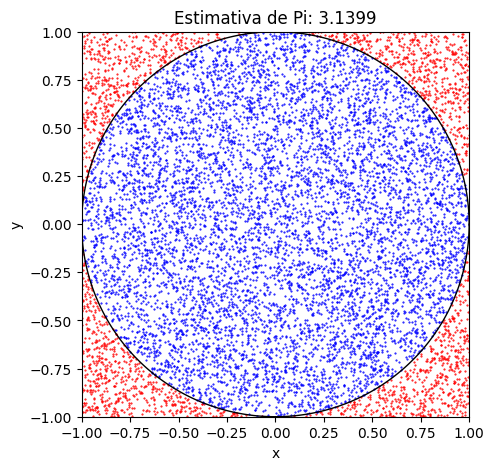

In [3]:
# Gerando pontos aleatórios
numero = 10000
x = np.random.uniform(-1, 1, numero)
y = np.random.uniform(-1, 1, numero)

# Definindo tamanho da figura
plt.figure(figsize=(5, 5))

# Plotando os pontos
# Os pontos internos são colocados em azul e os externos em vermelho
for coord_x, coord_y in zip(x, y):
    if coord_x**2 + coord_y**2 <= 1:
        plt.plot(coord_x, coord_y, 'b.', markersize=1)
    else:
        plt.plot(coord_x, coord_y, 'r.', markersize=1)

# Plotando a circunferência
for n in range(4):
    t = np.linspace(n*np.pi/2, (n + 1)*np.pi/2, 100)
    xc = np.cos(t)
    yc = np.sin(t)
    plt.plot(xc, yc, '-', linewidth=1, color="black")

# Definindo os limites do gráfico e os nomes dos eixos
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('y')

# Plotando o gráfico
plt.title('Estimativa de Pi: {:.4f}'.format(estimativa_pi(1000000)))
plt.show()

### **Convergência da Estimativa para o Valor Real**
##### Ao olhar para esse método, isto é, realizando simulações de $n = 10$ a $n=10^8$, percebe-se que, com $n \geq 3 \cdot 10^{6}$, o erro é consistentemente menor que 0,05%.

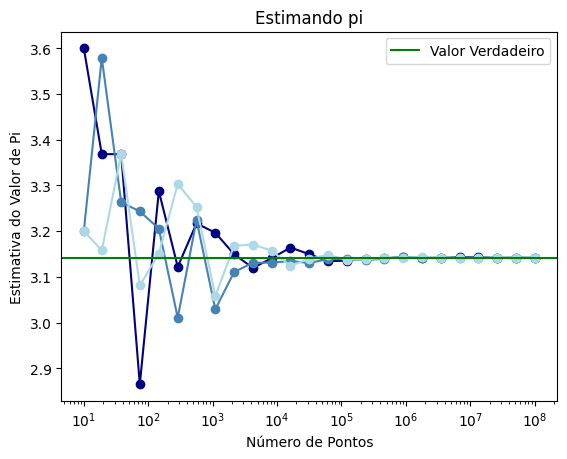

In [4]:
armazenar_lista = []
armazenar_estimativas = []
cores = ['#000080', '#4682b4', '#add8e6']

# Demora cerca de 5 minutos para rodar
for i in range(3):
    # Gerando uma lista de valores
    lista_quantidade_de_pontos = np.logspace(1, 8, num=25, dtype=int)
    armazenar_lista.append(lista_quantidade_de_pontos)

    # Gerando uma lista de estimativas para cada ponto
    pi_estimativas = [estimativa_pi(n) for n in lista_quantidade_de_pontos]
    armazenar_estimativas.append(pi_estimativas)

    # Gráfico mostrando como a estimativa se aproxima do valor real ao se aumentar o número de pontos
    plt.plot(lista_quantidade_de_pontos, pi_estimativas, 'o-', color=cores[i])

plt.axhline(np.pi, color='g', linestyle='-', label='Valor Verdadeiro')
plt.xscale('log')
plt.xlabel('Número de Pontos')
plt.ylabel('Estimativa do Valor de Pi')
plt.title('Estimando pi')
plt.legend()
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_25104\2866090228.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2e8)


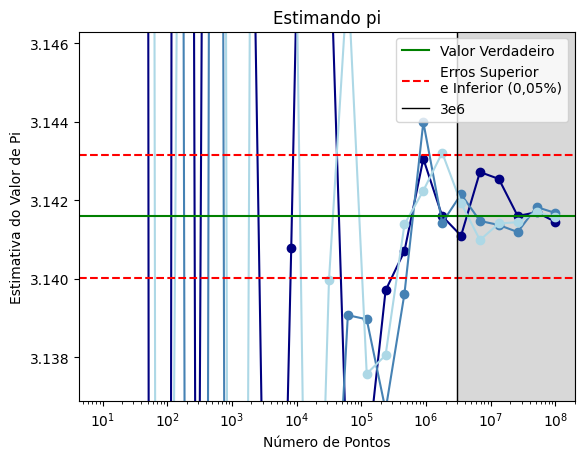

In [5]:
for numero, dados, i in zip(armazenar_lista, armazenar_estimativas, range(3)):
    # Gráfico mostrando como a estimativa se aproxima do valor real ao se aumentar o número de pontos, com os limites de erros
    plt.plot(numero, dados, 'o-', color=cores[i])

plt.axhline(np.pi, color='g', linestyle='-', label='Valor Verdadeiro')
plt.axhline(np.pi*(1.0005), color='r', linestyle='--', label='Erros Superior\ne Inferior (0,05%)')
plt.axhline(np.pi*(0.9995), color='r', linestyle='--')

plt.xscale('log')
plt.xlabel('Número de Pontos')
plt.ylabel('Estimativa do Valor de Pi')
plt.title('Estimando pi')

plt.fill_between([3e6, 2e8], plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], color='gray', alpha=0.3)
plt.axvline(3*(10**6), color='black', linestyle='-', linewidth=1, label='3e6')
plt.ylim(np.pi*(0.9985), np.pi*(1.0015))
plt.xlim(0, 2e8)

plt.legend()
plt.show()

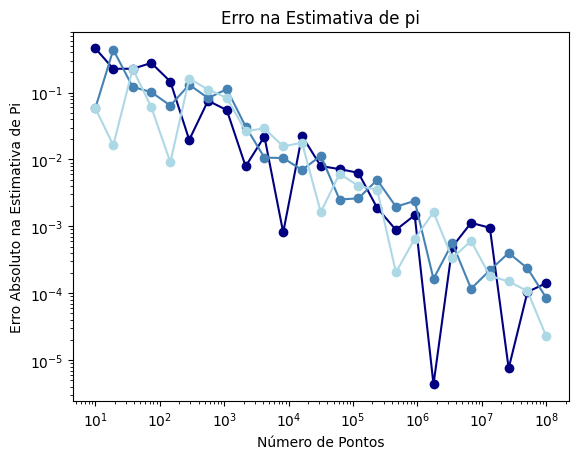

C:\Users\alexa\AppData\Local\Temp\ipykernel_25104\4049028464.py:32: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2e8)


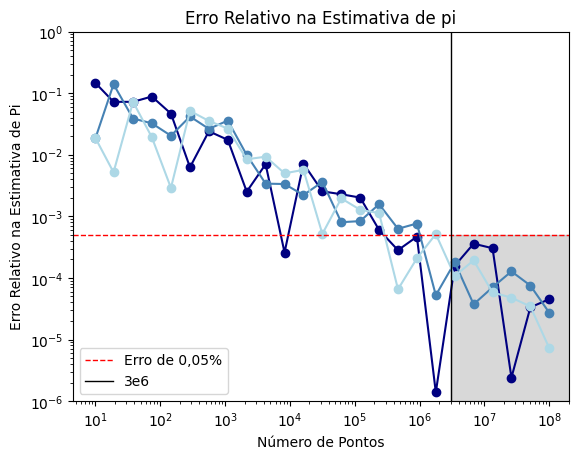

In [6]:
for numero, dados, i in zip(armazenar_lista, armazenar_estimativas, range(3)):
    # Calcular erro absoluto
    pi_erros = [np.abs(estimativa - np.pi) for estimativa in dados]

    # Plotar o erro em relação ao número de pontos
    plt.plot(numero, pi_erros, 'o-', color=cores[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Pontos')
plt.ylabel('Erro Absoluto na Estimativa de Pi')
plt.title('Erro na Estimativa de pi')
plt.show()

for numero, dados, i in zip(armazenar_lista, armazenar_estimativas, range(3)):
    # Calcular erro relativo
    pi_erros_relativos = [np.abs(estimativa - np.pi)/np.pi for estimativa in dados]

    # Plotar o erro em relação ao número de pontos
    plt.plot(numero, pi_erros_relativos, 'o-', color=cores[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Pontos')
plt.ylabel('Erro Relativo na Estimativa de Pi')
plt.title('Erro Relativo na Estimativa de pi')

plt.axhline(0.0005, color='red', linestyle='--', linewidth=1, label="Erro de 0,05%")
plt.axvline(3*(10**6), color='black', linestyle='-', linewidth=1, label="3e6")

plt.ylim(1e-6, 1)
plt.xlim(0, 2e8)

plt.fill_between([3e6, 2e8], plt.gca().get_ylim()[0], 5e-4, color='gray', alpha=0.3)

plt.legend()
plt.show()

### **Distribuição de Estimativas de $\pi$**

##### Ao obter-se uma amostra aleatória de tamanho $n$, pode-se utilizar a proporção amostral $p_a$ para estimar a proporção populacional $p$.
##### Com n grande, tem-se uma aproximação para uma distribuição normal: $p_a = N(p, \frac{p(1-p)}{n})$. Assim, obtem-se um intervalo de confiança para a proporção populacional (p) (com $\sigma_{p_m} = \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}$):
$$IC_p = \left[p_a - z \cdot \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}, p_a + z \cdot \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}\right]$$
##### Definindo-se a margem de erro ($e$) como metade do tamanho do intervalo de confiança, tem-se que: $$e = z \cdot \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}$$ **$$n = \left(\frac{z}{e}\right)^{2} \cdot p_a \cdot (1 - p_a)$$**

##### Para o valor de $p_a$, pode-se simplesmente estimá-lo ao rodar diversas vezes a simulação e obter uma média dos resultados. Assim, $p_a = \mu/4$.
##### No entanto, assumindo que não se conhece uma estimativa para o valor de $\pi$ (e, logo, para $p$), assume-se $p_a=0.5$ para obter o maior valor de n possível: **$$n=\left(\frac{z}{e}\right)^{2} \cdot 0.25$$**

###### - $z =$ z-score | $e =$ erro tolerado | $p =$ estimativa pontos dentro/pontos total

##### Como $\pi = 4p$, sendo $p = \frac{n_{dentro}}{n_{total}}$, tem-se que $\pi_a = 4p$ e $\sigma_{\pi_m} = 4\sigma_{p_m}$. Assim:
$$IC_\pi = \left[\pi_a - 4z \cdot \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}, \pi_a + 4z \cdot \sqrt{\frac{p_a \cdot (1 - p_a)}{n}}\right]$$

##### Portanto, analogamente ao processo anterior, tem-se que:
**$$n_\pi = 16\cdot\left(\frac{z}{e}\right)^{2} \cdot p_a \cdot (1 - p_a)$$**

##### Similarmente, no pior dos casos:
**$$n_\pi=4\cdot\left(\frac{z}{e}\right)^{2}$$**

Estimativa de n estimando pi pela média: 4.14e+07
Estimativa de n sem estimar pi: 6.15e+07


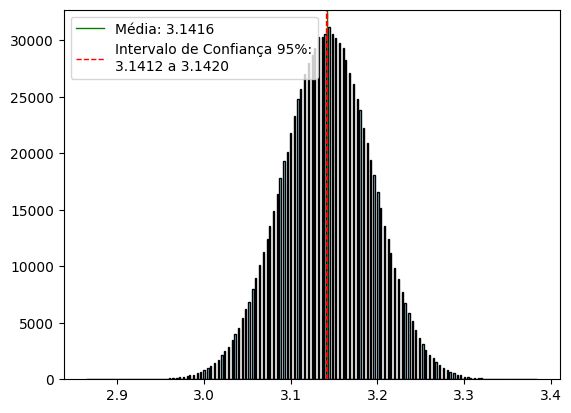

In [8]:
lista_desvio_padrao = []

lista = []
testes = 10**6
for m in range(testes):
    lista.append(estimativa_pi(10**3))

# Plotando o Histograma
plt.hist(lista, bins=350, color='skyblue', edgecolor='black')

# Calculando média e desvio padrão
z_score = 1.96
margem_de_erro = 0.0005
media = np.mean(lista)
desvio_padrao = np.std(lista)

# Calculando n
n = int(((z_score/margem_de_erro)**2) * 4)
n1 = int((z_score/margem_de_erro)**2 * (media/4) * (1 - (media/4)) * 16)
print(f"Estimativa de n estimando pi pela média: {n1:.2e}")
print(f"Estimativa de n sem estimar pi: {n:.2e}")
erro_padrao = desvio_padrao/np.sqrt(testes)

# Calculando intervalo de confiança de 95%
intervalo_de_confiança_upper = media + 4*z_score*erro_padrao
intervalo_de_confiança_lower = media - 4*z_score*erro_padrao

# Colocando os valores no gráfico
plt.axvline(media, color='green', linewidth=1, label=f'Média: {media:.4f}')
plt.axvline(intervalo_de_confiança_upper, color='red', linestyle='dashed', linewidth=1, label=f'Intervalo de Confiança 95%:\n{intervalo_de_confiança_lower:.4f} a {intervalo_de_confiança_upper:.4f}')
plt.axvline(intervalo_de_confiança_lower, color='red', linestyle='dashed', linewidth=1)
plt.legend()

# Mostrando o Gráfico
plt.show()